# Benchmark ComBind

Plot results from a single scoring run.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
rmsds = {}
with open('../../combind_sherlock/bpp_outputs/all_best_affinity-t=0.03-n=30/rmsds.csv') as fp:
    for line in fp:
        protein, ligand, best, glide, combind = line.strip().split(',')
        best, glide, combind = float(best), float(glide), float(combind)
        #if best > 2: continue
        if protein not in rmsds: rmsds[protein] = {}
        assert ligand not in rmsds[protein]
        rmsds[protein][ligand] = (best, glide, combind)

P00489 3L7B_lig 3.59830914847 0.394415766084
O60885 4LZS_lig 4.06931660875 2.03385603164
O60885 4NUC_lig 6.20064783675 3.08710102448
O60885 3U5J_lig 5.15157390608 0.500069572945
O60885 5ACY_lig 8.64459807634 2.42585963399
O60885 4NUE_lig 5.11914801436 3.626033311
O60885 2YEL_lig 6.7794585671 3.92436070805
Q16539 2BAL_lig 16.5802434025 14.4605207211
P07900 2XHT_lig 2.60946350413 0.878790438912
P07900 2YI0_lig 5.67034002886 1.79584157848
P07900 2QG2_lig 7.43374080761 5.93832377152
P18031 1ONY_lig 12.0468494727 10.6921980896
P18031 1PYN_lig 9.71660251641 7.71978304824
P18031 1NO6_lig 13.1305082241 7.11086963393
P18031 1ONZ_lig 13.2536669975 7.94035089451
P56817 2G94_lig 12.2119725486 6.1397444351
P56817 3BUH_lig 5.08958515473 1.41152121128
P56817 3L59_lig 7.13159110597 3.00794957187
PLK1 3THB_lig 4.48999615112 1.33010108817
DTRANSP 4XPA_lig 5.75016514198 1.4350210382
P00734 1D6W_lig 7.97251572398 4.77025959797
P00760 1G36_lig 2.87342909644 1.29495814699
P00760 1BJV_lig 6.8171376885 5.3499

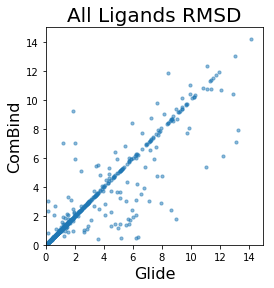

In [3]:
from scipy.stats import ttest_rel
x, y = [], []
for prot, ligs in rmsds.items():
    for lig, (best, glide, combind) in ligs.items():
        x += [glide]
        y += [combind]
        #if combind < glide+1:
        if combind+1 < glide:
            print prot, lig, glide, combind

print ttest_rel(x, y)
f, ax = plt.subplots()
plt.scatter(x, y, alpha = 0.5, s = 10)
plt.xlabel('Glide', fontsize = 16)
plt.ylabel('ComBind', fontsize = 16)
plt.title('All Ligands RMSD', fontsize = 20)
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.xticks(range(0, 15, 2), range(0, 15, 2))
ax.set_aspect('equal', 'box')
print 'Glide Average:', sum(x) / float(len(x)), sum(np.array(x) <= 2.0) /  float(len(x))
print 'ComBind Average:', sum(y) / float(len(y)), sum(np.array(y) <= 2.0) /  float(len(y))
# 3.67435312 with best_mcss.txt
# 3.64923135235 with best_affinity.txt

# 3.48206150403 with best_affinity.txt, t = 0.05 (Only improvements!!!)

In [4]:
x, y = np.array(x), np.array(y)

In [5]:
tol = .3
sum((y - x) > tol), sum((y - x) < -tol), sum(((y-x)<tol)*((y - x)>-tol))

(43, 61, 382)

Q16539 1YQJ_lig
ERA 2AYR_lig
P56817 3I25_lig
MEK1 3ZLS_lig
MEK1 3ZLW_lig
JAK2 3UGC_lig
GCR 3K23_lig
GCR 3BQD_lig
GCR 3K22_lig
SMO 4O9R_lig
SMO 4N4W_lig
CDK2 1FIN_lig
BRAF 4E26_lig
Glide Average: 3.45658782578
ComBind Average: 1.92247584714 0.716049382716


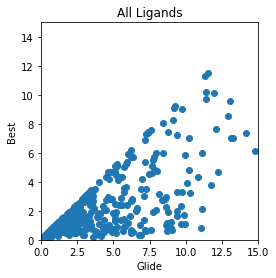

In [6]:
x, y = [], []
for prot, ligs in rmsds.items():
    for lig, (best, glide, combind) in ligs.items():
        if best > 8:
            print prot, lig
        x += [glide]
        y += [best]
f, ax = plt.subplots()
plt.scatter(x, y)
plt.xlabel('Glide')
plt.ylabel('Best')
plt.title('All Ligands')
plt.xlim(0, 15)
plt.ylim(0, 15)
ax.set_aspect('equal', 'box')
print 'Glide Average:', sum(x) / float(len(x))
print 'ComBind Average:', sum(y) / float(len(y)), sum(np.array(y) <= 2.0) /  float(len(y))

In [7]:
# for prot, ligs in rmsds.items():
#     x, y = [], []
#     for lig, (best, glide, combind) in ligs.items():
#         x += [glide]
#         y += [combind]
#     f, ax = plt.subplots()
#     plt.scatter(x, y)
#     plt.xlabel('Glide')
#     plt.ylabel('ComBind')
#     plt.xlim(0, 15)
#     plt.ylim(0, 15)
#     ax.set_aspect('equal', 'box')
#     plt.title(prot)
#     plt.show()

3.32227704766 3.16261780208


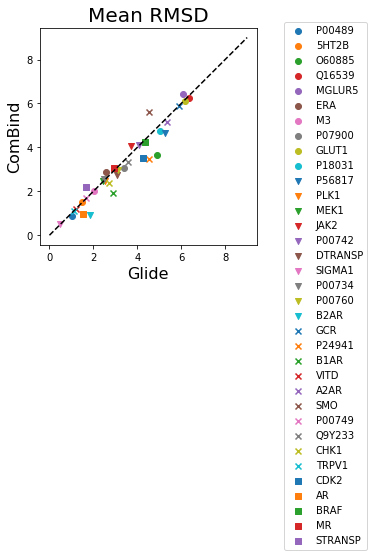

In [8]:
x, y, label = [], [], []
for prot, ligs in rmsds.items():
    _x, _y = [], []
    for lig, (best, glide, combind) in ligs.items():
        _x += [glide]
        _y += [combind]
    label += [prot]
    x += [sum(_x)/float(len(_x))]
    y += [sum(_y)/float(len(_y))]
    
markers = ['o', 'v', 'x', 's']
f, ax = plt.subplots()
for i, (_x, _y, _label) in enumerate(zip(x, y, label)):
    plt.scatter(_x, _y, marker = markers[i/10], label = _label)
plt.xlabel('Glide', fontsize = 16)
plt.ylabel('ComBind', fontsize = 16)
plt.title('Mean RMSD', fontsize = 20)
#plt.xlim(0, 5)
#plt.ylim(0, 5)
plt.plot(range(10), linestyle='--', c = 'k')
ax.set_aspect('equal', 'box')
print sum(x) / float(len(x)), sum(y) / float(len(y))
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

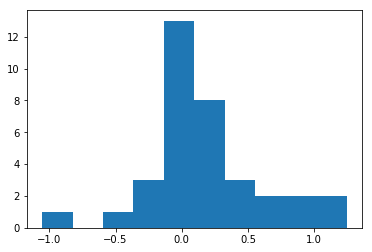

In [9]:
plt.hist(np.array(x) - np.array(y))
plt.show()

P00489 20
5HT2B 2
O60885 17
Q16539 11
MGLUR5 5
ERA 18
M3 2
P07900 20
GLUT1 3
P18031 20
P56817 20
PLK1 12
MEK1 20
JAK2 20
P00742 20
DTRANSP 9
SIGMA1 2
P00734 20
P00760 20
B2AR 8
GCR 18
P24941 13
B1AR 12
VITD 20
A2AR 18
SMO 7
P00749 20
Q9Y233 20
CHK1 20
TRPV1 2
CDK2 19
AR 11
BRAF 19
MR 13
STRANSP 5
0.514183962138 0.528977999739


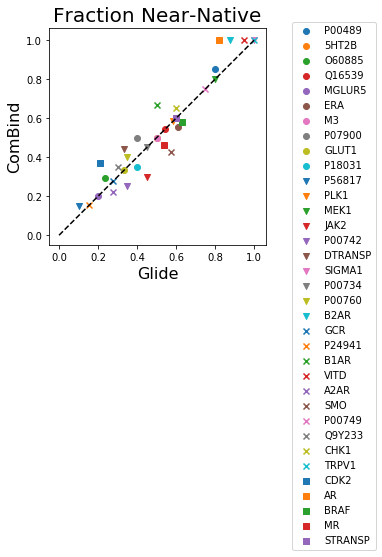

In [14]:
x, y = [], []
for prot, ligs in rmsds.items():
    _x, _y = [], []
    for lig, (best, glide, combind) in ligs.items():
        _x += [glide <= 2.0]
        _y += [combind <= 2.0]
    label += [prot]
    print prot, len(_x)
    x += [sum(_x)/float(len(_x))]
    y += [sum(_y)/float(len(_y))]
    
markers = ['o', 'v', 'x', 's']
f, ax = plt.subplots()
for i, (_x, _y, _label) in enumerate(zip(x, y, label)):
    plt.scatter(_x, _y, marker = markers[i/10], label = _label)
plt.xlabel('Glide', fontsize = 16)
plt.ylabel('ComBind', fontsize = 16)
plt.plot(range(2), linestyle='--', c = 'k')
plt.title('Fraction Near-Native', fontsize = 20)
ax.set_aspect('equal', 'box')
print sum(x) / float(len(x)), sum(y) / float(len(y))
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

(array([  1.,   0.,   2.,   0.,   1.,   8.,   5.,  17.,   0.,   1.]),
 array([-0.5       , -0.43571429, -0.37142857, -0.30714286, -0.24285714,
        -0.17857143, -0.11428571, -0.05      ,  0.01428571,  0.07857143,
         0.14285714]),
 <a list of 10 Patch objects>)

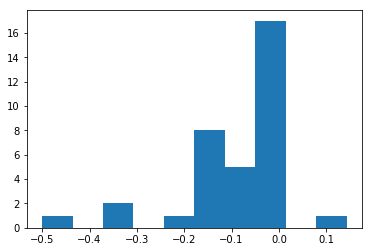

In [13]:
plt.hist(np.array(x) - np.array(y))